In [1]:
#necessary import
from imutils.contours import sort_contours
import imutils
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

In [2]:
def symbol(ind):
    symbols = ['+',1, 2, 3, 4, 5, 6, 7, 8, 9,'=','X','^','y']
    symb = symbols[ind.argmax()]
    return symb

In [5]:
save_path= r"C:\Users\LENOVO IP 330S\Desktop\aakash\Minor Project\Minor Project\final project files\model"

In [6]:
from tensorflow.keras.models import load_model

model2 = load_model(os.path.join(save_path,'model.h5'))

In [7]:
def prediction(image_path):
    img = cv2.resize(image_path,(45, 45))
    norm_image = cv2.normalize(img, None, alpha = 0, beta = 1, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
    norm_image = norm_image.reshape((norm_image.shape[0], norm_image.shape[1], 1))
    case = np.asarray([norm_image])
    pred = model2.predict([case])
    
    return symbol(pred)

In [8]:
cap= cv2.VideoCapture(0)
##cap.set(cv.CAP_PROP_FPS, 170)
#cap.set(3,640) # adjust width
#cap.set(4,480) # adjust height

while True:
    ret, image = cap.read()
#image = cv2.imread('/content/holata.png')
#image= '/content/+.jpg'
#image = cv2.resize(image,(300,300))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
# perform edge detection, find contours in the edge map, and sort the
# resulting contours from left-to-right
#edged = cv2.Canny(blurred, 60, 150)
    ret,im_th= cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY_INV)

    cnts = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    chars=[]
    for c in cnts:
    # compute the bounding box of the contour
        (x, y, w, h) = cv2.boundingRect(c)
    # filter out bounding boxes, ensuring they are neither too small
    # nor too large
        if w*h>1200:
        # extract the character and threshold it to make the character
        # appear as *white* (foreground) on a *black* background, then
        # grab the width and height of the thresholded image
            roi = gray[y:y + h, x:x + w]
            chars.append(prediction(roi))
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 3)
            cv2.putText(image, str(prediction(roi)), (x, y), cv2.FONT_HERSHEY_DUPLEX,  0.7, (0,0,255), 2)
    
    cv2.imshow('HMF',image)
    
    if cv2.waitKey(1) & 0xFF==ord('q'): # quit when 'q' is pressed
        cap.release()
        break
print(chars)    

#from google.colab.patches import cv2_imshow
#cv2.imshow('HMF',image)        
cv2.destroyAllWindows() 
cv2.waitKey()

[2, 1]


-1

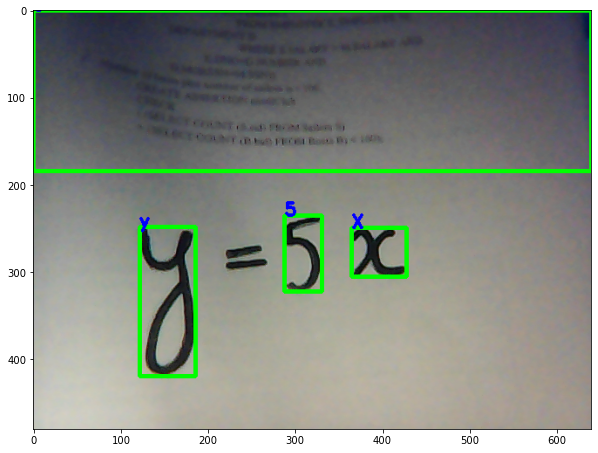

In [42]:
plt.figure(figsize=(10,10))
plt.imshow(image)

In [43]:
chars

[9, 'y', 5, 'X']

In [ ]:
#now define logic to draw graph